In [2]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
m1 = tf.constant([[2,2]])
m2 = tf.constant([[3],[3]])
dot_operation = tf.matmul(m1, m2)

In [4]:
print(dot_operation)#can't print, have to create a session

Tensor("MatMul:0", shape=(1, 1), dtype=int32)


We need to create session and run the operation.

## What is a session in TensorFlow?
A Session object encapsulates the environment in which Operation objects are executed, and Tensor objects are evaluated.

In [7]:
sess = tf.Session()
result = sess.run(dot_operation)
print(result)
sess.close()

[[12]]


In [8]:
var = tf.Variable(8)

In [9]:
var

<tf.Variable 'Variable:0' shape=() dtype=int32_ref>

In [10]:
add_operation = tf.add(var, 1)
update_operation = tf.assign(var, add_operation)      # var will hold new value add_operation

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(3):
        sess.run(update_operation)
        print(sess.run(var))

9
10
11


## Placeholder

A placeholder is a variable to which we assign data to a later date. It allows us to create out operations and buid our computation graph, without needing the data.
In TensorFlow terms, we feed the data into the graph through these placeholders.

In [21]:
x1 = tf.placeholder(dtype=tf.float32, shape=None)
y1 = tf.placeholder(dtype=tf.float32, shape=None)
z1 = x1 + y1

x2 = tf.placeholder(dtype=tf.float32, shape=[2,1])
y2 = tf.placeholder(dtype=tf.float32, shape=[1,2])
z2 = tf.matmul(x2, y2)
with tf.Session() as sess:
    # running one operation
    z1_value = sess.run(z1, feed_dict={x1: 5, y1: 6})
    print(z1_value)
    print("*****")
    # running two operations at once
    z1_value, z2_value = sess.run(
    [z1, z2],
    feed_dict = {
        x1:1, y1:2,
        x2:[[2],[3]], y2:[[3,3]]
    })
    print(z1_value)
    print("*****")
    print(z2_value)

11.0
*****
3.0
*****
[[6. 6.]
 [9. 9.]]


## Activation Function

Activation function scales output of a node given an input or set of input.

In [95]:
x = np.linspace(-5,5,200)
y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_tanh = tf.nn.tanh(x)
y_softplus = tf.nn.softplus(x)

In [28]:
sess = tf.Session()
y_relu, y_sigmoid, y_tanh, y_softplus = sess.run([y_relu, y_sigmoid, y_tanh, y_softplus])

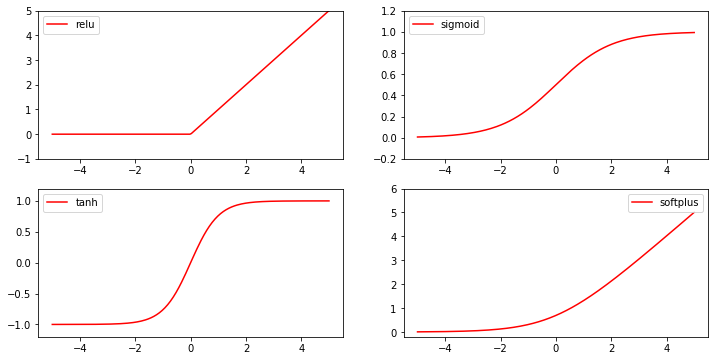

In [37]:
plt.figure(1, figsize=(12, 6))
plt.subplot(221)
plt.plot(x, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()

# Tensorflow Networks

## Regression
We will make a dummy data for feeding in the model. The NN will be trained to predict from the dummy data.

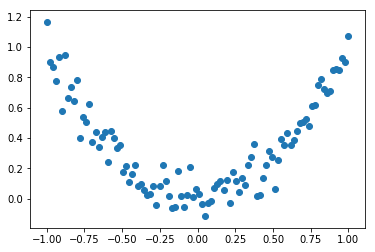

In [106]:
tf.set_random_seed(1)
np.random.seed(1)

# data initialization
# linspace creates a list with continous intervals of range -1 to 1
# newaxis increases the dimension i.e. changes (1,100) to (100,1)
x = np.linspace(-1,1,100)[:, np.newaxis]
noise = np.random.normal(0,0.1,size=x.shape)#center=0, scale=0.1, gaussian
y = np.power(x,2) + noise

# plot the data
plt.scatter(x,y)
plt.show()

In [108]:
x.shape

(100, 1)

In [109]:
tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.float32, y.shape)

In [110]:
x.shape

(100, 1)

### Initializing layers in Neural Network

In [100]:
l1 = tf.layers.dense(tf_x,10,tf.nn.relu) #(100,1) , 10
l1

<tf.Tensor 'dense_5/Relu:0' shape=(100, 10) dtype=float32>

In [101]:
output = tf.layers.dense(l1, 1) #10, 1
output

<tf.Tensor 'dense_6/BiasAdd:0' shape=(100, 1) dtype=float32>

## optimization

In [111]:

# hidden layer
l1 = tf.layers.dense(tf_x,10,tf.nn.relu)
# output layer
output = tf.layers.dense(l1, 1)

# compute cost
loss = tf.losses.mean_squared_error(tf_y, output)
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.5)
train_op = optimizer.minimize(loss)

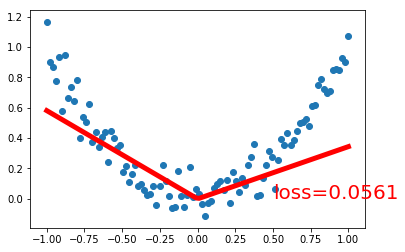

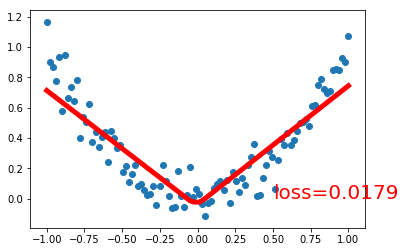

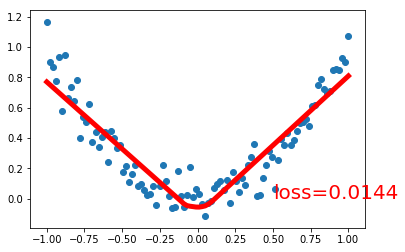

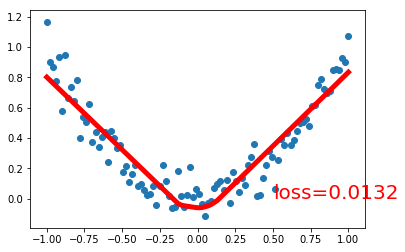

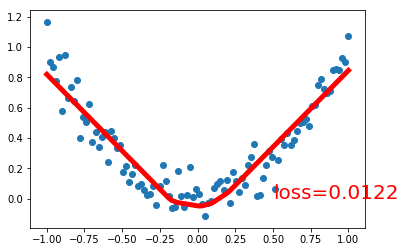

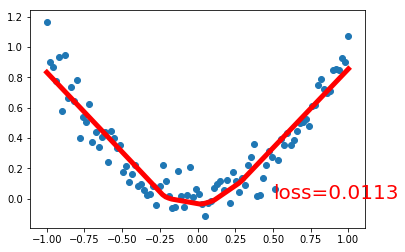

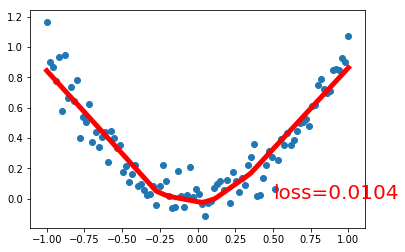

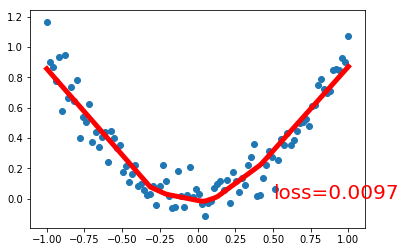

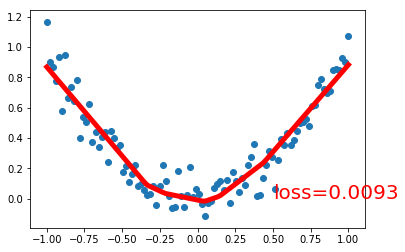

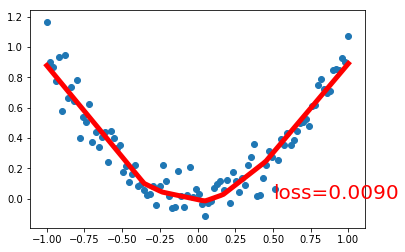

In [78]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())#initiate/activate global variables

plt.ion()

for step in range(100):
    _, l, pred = sess.run([train_op, loss, output], {tf_x: x, tf_y: y})
    if step%10 == 0:
        plt.cla()
        plt.scatter(x,y)
        plt.plot(x, pred, 'r-', lw=5)
        plt.text(0.5, 0, 'loss=%.4f' % l, fontdict = {'size': 20, 'color':'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()

## Classification

### Generating fake data

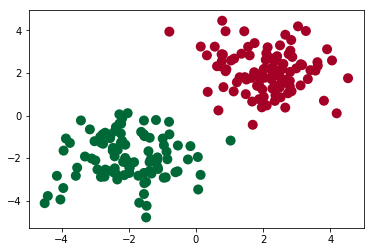

In [112]:
n_data = np.ones((100,2))
# numpy.random.normal draws random samples from a normal(Gaussian) distribution
x0 = np.random.normal(2*n_data,1)      # class0 x shape =(100,2)
y0 = np.zeros(100)                     # class0 y shape =(100,1)
x1 = np.random.normal(-2*n_data, 1)    # class1 x shape =(100,2)
y1 = np.ones(100)                      # class1 y shape =(100,1)
# vertical stacking
x = np.vstack((x0, x1))    # shape (200,2) + some noise 
# horizontal stacking
y = np.hstack((y0, y1))    # shape (200, )

plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')
plt.show()


In [113]:
# input x and y
tf_x = tf.placeholder(tf.float32, x.shape)
tf_y = tf.placeholder(tf.int32, y.shape)

In [114]:
x.shape

(200, 2)

### Making Neural Network layers

In [115]:
l1 = tf.layers.dense(tf_x, 10, tf.nn.relu) # hidden layer
output = tf.layers.dense(l1, 2)           # output layer

loss = tf.losses.sparse_softmax_cross_entropy(labels=tf_y, logits=output)    # cost function
# return (acc, update_op), and create 2 local variable
accuracy = tf.metrics.accuracy(labels=tf.squeeze(tf_y), predictions=tf.argmax(output, axis=1),)[1]
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_op = optimizer.minimize(loss)

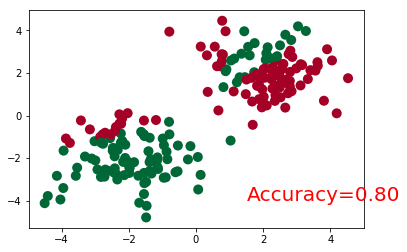

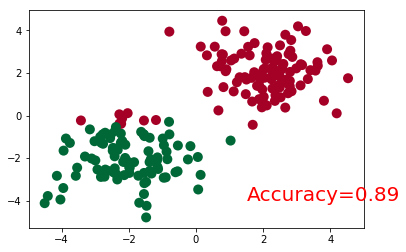

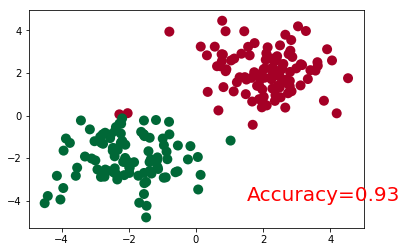

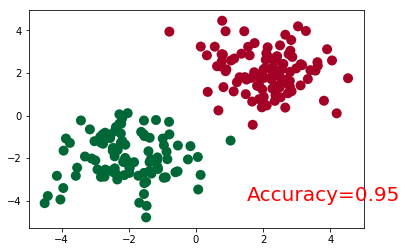

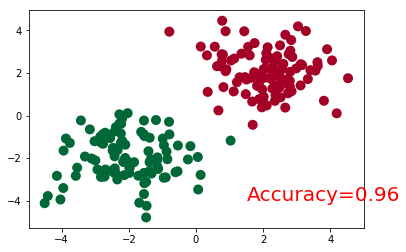

In [119]:
sess = tf.Session()
init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
sess.run(init_op)

plt.ion()
for step in range(10):
    _, acc, pred = sess.run([train_op, accuracy, output], {tf_x: x, tf_y: y})
    if step%2 == 0:
        plt.cla()
        plt.scatter(x[:, 0], x[:, 1], c=pred.argmax(1), s=100, lw=0, cmap='RdYlGn')
        plt.text(1.5, -4, 'Accuracy=%.2f' % acc, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)
        
plt.ioff()
plt.show()

# optimizer

In [120]:
LR = 0.01
BATCH_SIZE = 32

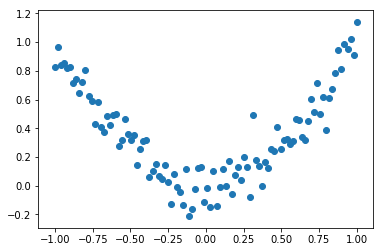

In [121]:
# fake data
x = np.linspace(-1, 1, 100)[:, np.newaxis]          # shape (100, 1)
noise = np.random.normal(0, 0.1, size=x.shape)
y = np.power(x, 2) + noise                          # shape (100, 1) + some noise

# plot dataset
plt.scatter(x, y)
plt.show()

In [123]:
class Net:
    def __init__(self, opt, **kwargs):
        self.x = tf.placeholder(tf.float32, [None,1])
        self.y = tf.placeholder(tf.float32, [None,1])
        l = tf.layers.dense(self.x, 20, tf.nn.relu)
        out = tf.layers.dense(l,1)
        self.loss = tf.losses.mean_squared_error(self.y, out)
        self.train = opt(LR, **kwargs).minimize(self.loss)
        
# Different Nets
net_SGD = Net(tf.train.GradientDescentOptimizer)
net_Momentum = Net(tf.train.MomentumOptimizer, momentum=0.9)
net_RMSprop = Net(tf.train.RMSPropOptimizer)
net_Adam = Net(tf.train.AdamOptimizer)

nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

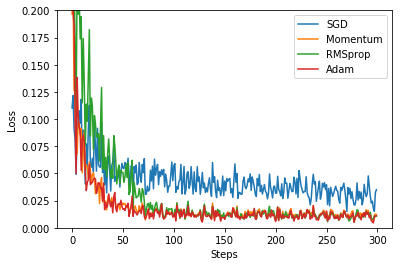

In [126]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

losses_his = [[],[],[],[]]          # recode loss

#training
for step in range(300):
    index = np.random.randint(0, x.shape[0], BATCH_SIZE)
    b_x = x[index]
    b_y = y[index]
    
    for net, l_his in zip(nets, losses_his):
        _, l = sess.run([net.train, net.loss], {net.x: b_x, net.y: b_y})
        l_his.append(l)    #loss recoder
        
#plot loss history
labels = ['SGD', 'Momentum','RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label = labels[i])
plt.legend(loc = 'best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0,0.2))
plt.show()
